# Exercício de Regressão Linear - PyTorch

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

## Carregando dados

In [2]:
iris = load_iris()

## Comprimento das sépalas (x) e sépalas (y)

In [3]:
ndata = iris.data[iris.target==1,::2]

## Transformando array numpy em tensores torch

In [4]:
tdata = torch.from_numpy(ndata)

x = tdata[:,0:1]
y = tdata[:,1:2]

## Normalização dos dados

In [5]:
a = [x.min(), y.min()]
a = min(a)
b = [x.max(), y.max()]
b = max(b)
x -= a
x /= b    # normalização
y -= a
y /= b

## Função para computar erro

In [36]:
def compute_cost(X_b, y, wT):
    e = X_b.mm(wT) - y
    J = (e * e)
    J = torch.mean(J, 0)
    return J

## Função para computar o gradiente descendente

In [20]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    M = y.size()[0]
    w_history = torch.zeros((2,n_epochs+1)) # cria w_history com tamanho n_epochs + 1
    wT = w_init.t()
    w_history[:,0] = wT[:,0] # guarda o w inicial
    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.t()).mm(X.mm(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.t()

## Calculando os pesos

In [78]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 1000
lr = 0.1

n_samples = y.shape[0]

#Montagem da matriz X agora com os elementos 1 na primeira coluna
ones = torch.ones(n_samples,1)
ones = ones.type(torch.DoubleTensor)
X_bias = torch.cat((ones, x), 1)
w_init = torch.zeros(1,2).type(torch.DoubleTensor)

w_history = batch_gradient_descent(X_bias, y, w_init, lr, iterations)

## Solução analítica

In [122]:
w_opt = (torch.inverse((X_bias.t()).mm(X_bias)).mm(X_bias.t())).mm(y)

## Define pesos para plotar o erro

In [80]:
def xy_grid(h, w, s):
    x = torch.linspace(h, w, s)
    y = torch.linspace(h, w, s)
    grid = torch.stack([x.repeat(s), y.repeat(s,1).t().contiguous().view(-1)],1)
    return grid.t().type(torch.DoubleTensor)

## Plota erro

In [91]:
def Jview(X_bias, y, w_history, w_opt):

    # parâmetros da função
    # quantos pesos gerar
    all = 1000
    # valor mínimo do grid
    min = -0.4
    # valor máximo do grid
    max = 1.0
    
    # Cálculo da matriz bidimensional de parâmetros
    X, Y = np.meshgrid(np.linspace(min, max, all), 
                         np.linspace(min, max, all))
    
    # Cálculo da matriz bidimensional de parâmetros
    wT = xy_grid(min, max, all)
        
    # calculo do custo
    J = compute_cost(X_bias, y, wT).view(all,all)
    J = J.numpy()
    
    # plotagem do espaço de parâmetros
    plt.figure(figsize=(8,4))
    CS = plt.contourf(X, Y, J, 30, cmap=plt.cm.Blues_r)

    # plotagem do histórico dos pesos durante o treinamento
    w0 = w_history[0:,0].numpy()
    w1 = w_history[0:,1].numpy()
    plt.scatter(w0, w1, marker='o', c='r')

    w_opt = w_opt.numpy()
    
    # plotagem do da solução analítica
    plt.plot(w_opt[0], w_opt[1], 'wx')
    
    plt.title('Visualização do treinamento de w na função de Custo J')
    
    # salva imagem
    plt.savefig('fig_custo.png')

    plt.show()

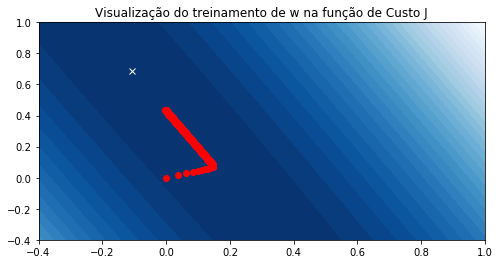

In [90]:
# Visualização do treinamento de w na função de Custo J
Jview(X_bias, y, w_history, w_opt)

In [118]:
def Jview3D(X_bias, y, w_history, w_opt):

    # parâmetros da função
    # quantos pesos gerar
    all = 100
    # valor mínimo do grid
    min = -0.45
    # valor máximo do grid
    max = 1.0
    
    # Cálculo da matriz bidimensional de parâmetros
    X, Y = np.meshgrid(np.linspace(min, max, all), 
                         np.linspace(min, max, all))
    
    # Cálculo da matriz bidimensional de parâmetros
    wT = xy_grid(min, max, all)
    
    # calculo do custo
    J = compute_cost(X_bias, y, wT).view(all,all)
    J = J.numpy()

    # plotagem do espaço de parâmetros x perda
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    
    # plotagem da superfície
    #ax.plot_surface(X, Y, J, cmap='jet', alpha=1)
    
    # plotagem das superfícies de nível
    ax.contour(X, Y, J, 100)

    # calculo do custo de w_history
    # e = X_bias.dot(w_history.T) - y
    # J = ((e * e).mean(axis=0))
    J = compute_cost(X_bias, y, w_history.t().type(torch.DoubleTensor))
    J = J.numpy()
    
    # plotagem do histórico dos pesos durante o treinamento
    w_history = w_history.numpy()
    w0 = w_history[0:,0]
    w1 = w_history[0:,1]
    ax.scatter(w0, w1, J, c='red', marker='o')

    # calculo do custo w_opt
    # e = X_bias.dot(w_opt) - y
    # J = ((e * e).mean(axis=0))
    J = compute_cost(X_bias, y, w_opt)
    J = J.numpy()
    
    w_opt = w_opt.numpy()
    # plotagem do da solução analítica
    ax.plot(w_opt[0], w_opt[1], J, 'bx')

    ax.set_xlabel('W0')
    ax.set_ylabel('W1')
    ax.set_zlabel('Custo (J)')
    
    # salva imagem
    plt.savefig('fig_custo3d.png')
    
    plt.show()

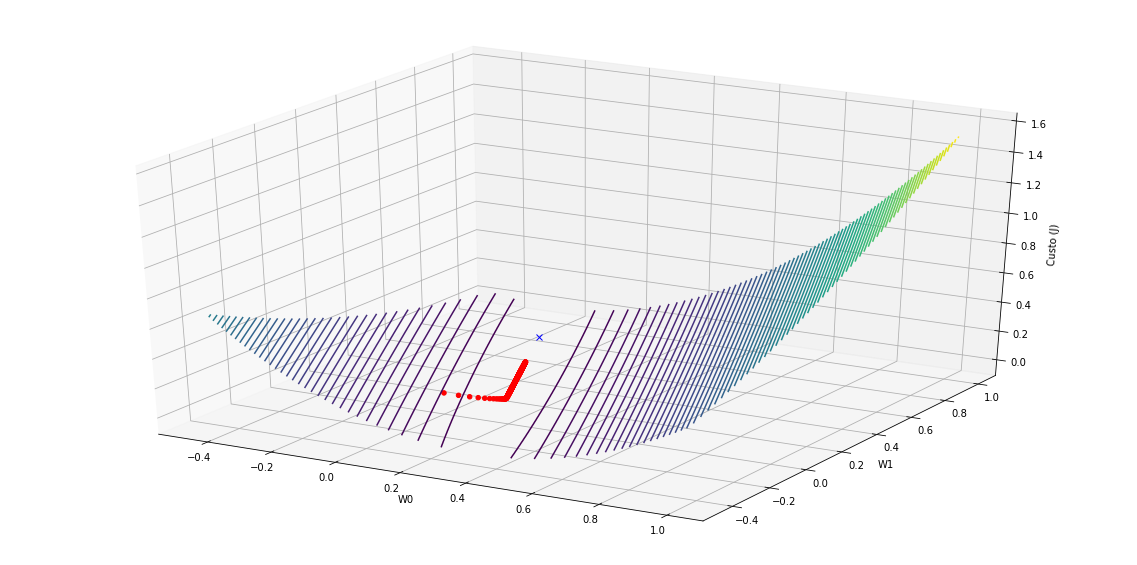

In [119]:
# Visualização da Perda x Parâmetros w0,w1 em gráfico 3D
Jview3D(X_bias, y, w_history, w_opt)

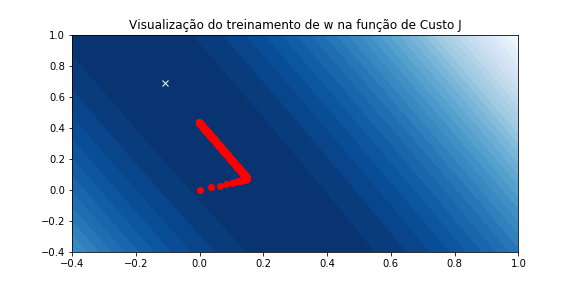

In [120]:
import IPython
img = IPython.display.Image(filename='fig_custo.png')
img

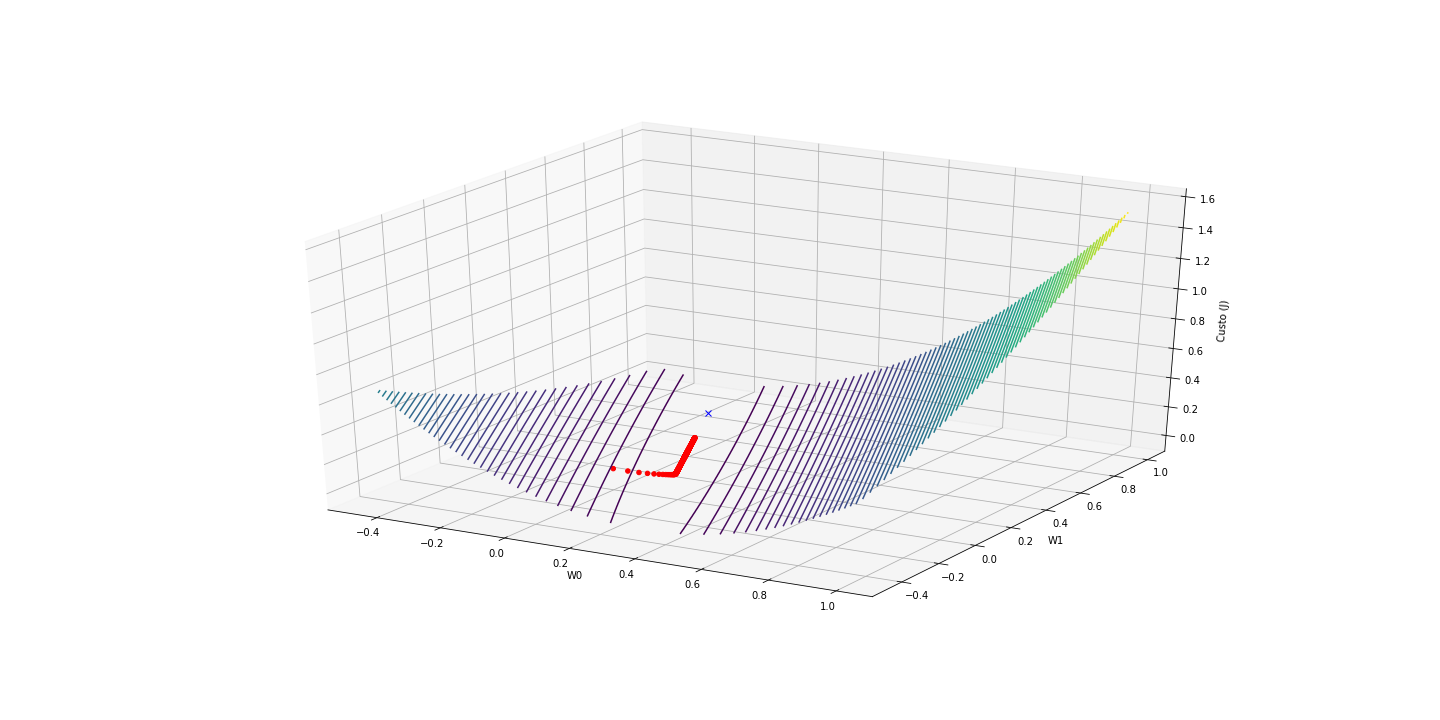

In [121]:
img3d = IPython.display.Image(filename='fig_custo3d.png')
img3d